The objective of this work is to evaluate the performance of a classifier in the task of recognizing images of human faces. The evaluation will be done using the success rate of the Bayesian classifier. The database to be used will be Olivetti faces, in this exercise a dimensionality reduction technique will also be used in the database, PCA, presented in the classroom.


Below are the libraries used to solve this exercise


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle

The ShowImage() function takes an array of integers as input and displays an image. The input array must contain the pixel values ​​of an image, organized in a 64x64 matrix.


In [ ]:
def MostraImagem(x):
  img = x.reshape(64, 64)
  plt.imshow(img, cmap='gray', origin='upper', extent=[0, 64, 0, 64])
  plt.show()

The Olivetti database is a dataset of human faces. The dataset contains 400 images, each of a different person. The images are sized 64x64 and are in grayscale. The database import can be viewed below


In [ ]:
data = scipy.io.loadmat('/content/drive/My Drive/UFMG/Reconhecimento de padrões/00.Data/olivettifaces.mat')
faces = data['faces']

faces

FileNotFoundError: ignored

The code below scales the data from the Olivetti database, applies the PCA algorithm to reduce the dimensionality of the data from 400 to 10 dimensions, and creates labels for the samples according to the order in which they appear in the database. The result is a faces_pca matrix that contains the reduced dimension data for each sample in the database, and a vector y that contains the sample labels.


In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=10)

faces_scaled = scaler.fit_transform(faces)
faces_pca = pca.fit_transform(faces_scaled)

y = []
for i in range(len(faces_pca)):
  y.append(i // 10 + 1)
y = np.array(y)

The code below shuffles the samples from the faces_pca matrix and the y vector to avoid bias in the results. It also initializes two vectors to store the classifier accuracy and the confusion matrix to visualize the classifier performance.


In [ ]:
faces_pca, y = shuffle(faces_pca, y, random_state=1)

accuracy_vec = np.zeros(10)
confusion_matrix_sum = np.zeros((40, 40))

The code below runs 10 cross-validation experiments, with each experiment using a different random split of the data into training and testing. The classifier accuracy is calculated for each experiment and stored in a vector. The accumulated confusion matrix is ​​updated with the confusion matrix for each experiment.
This cross-validation process is used to estimate the accuracy of the classifier on new, unseen data.


In [ ]:
for k in range(10):
  x_train, x_test, y_train, y_test = train_test_split(faces_pca, y, test_size=0.5, random_state=k)

  model = GaussianNB()
  model.fit(x_train, y_train)
  y_hat = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_hat)
  accuracy_vec[k] = accuracy

  confusion_matrix_sum += confusion_matrix(y_test, y_hat, labels=range(1, 41))

The confusion matrix is ​​generated to visualize the performance of the classifier. The confusion matrix is ​​a table that shows how many examples of each class were classified correctly or incorrectly.


Vetor de acurácia: [0.33300781 0.33105469 0.31787109 0.29003906 0.30126953 0.30712891
 0.30419922 0.31347656 0.29882812 0.31494141]
Acurácia Média: 0.311181640625
Desvio Padrão: 0.01303271959100418




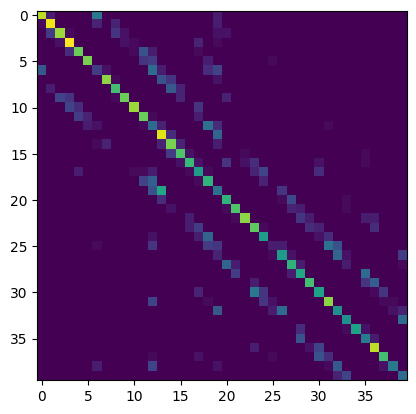

In [ ]:
print(f'Vetor de acurácia: {accuracy_vec}\nAcurácia Média: {np.mean(accuracy_vec)}\nDesvio Padrão: {np.std(accuracy_vec)}\n\n')

plt.imshow(confusion_matrix_sum, cmap='viridis', interpolation='nearest')
plt.show()


The experiment carried out with only 10 main components did not obtain satisfactory results. The confusion matrix shows that some samples were projected on top of other classes, which can lead to classification errors.

An alternative is to increase the number of principal components to improve class separation. Furthermore, it is important to analyze the confusion matrix to identify possible classification problems.

Despite the lower than expected results, the experiment was useful for evaluating the PCA algorithm and using it in conjunction with a Bayes classifier.